<a href="https://colab.research.google.com/github/FarrazNouval/LGMVIP--DataScience/blob/main/Stock_Market_Prediction_And_Forecasting_Using_Stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><strong><center>Stock Market Prediction And Forecasting Using Stacked LSTM</center></strong></h1>


## 1. import modules


In [39]:
import tensorflow as tf
import keras
from keras.layers import LSTM, Dense, Dropout, Input
from keras.models import Sequential, Model, load_model
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Load The Dataset

In [2]:
dataset = pd.read_csv('/content/NSE-TATAGLOBAL.csv')
dataset.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


## 3. Inspect The Dataset

In [3]:
dataset.describe()


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [4]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


## 4. Manipulate and Prepare The Dataset to Train The Model

In [5]:
dataset["Date"] = pd.to_datetime(dataset['Date'], format="%Y-%m-%d")


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


In [7]:
dataset.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [8]:
def to_lower(text):
  low = text.lower()
  text = ''
  for i in low:
    if i == " ":
      text += "_"
    else:
      text += i
  
  return text

dataset.columns = dataset.columns.map(to_lower)
dataset.head()
     

,date,open,high,low,last,close,total_trade_quantity,turnover_(lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


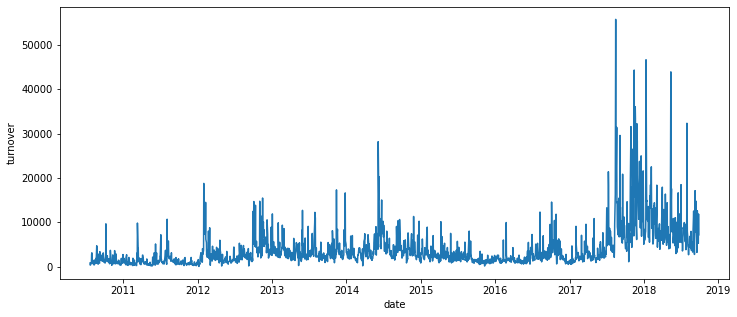

In [20]:
plt.figure(figsize=(12, 5))

plt.plot(dataset['date'], dataset['turnover_(lacs)'], label='turnover_(lacs)')
plt.xlabel('date')
plt.ylabel('turnover');


In [21]:
dataset = dataset.set_index(dataset['date'])
dataset = dataset.drop('date', axis=1)

In [22]:
df = dataset['turnover_(lacs)']
df

date
2018-09-28     7162.35
2018-09-27    11859.95
2018-09-26     5248.60
2018-09-25     5503.90
2018-09-24     7999.55
                ...   
2010-07-27      694.98
2010-07-26      780.01
2010-07-23      340.31
2010-07-22      355.17
2010-07-21      803.56
Name: turnover_(lacs), Length: 2035, dtype: float64

In [23]:
scaler = StandardScaler()
df = scaler.fit_transform(np.array(df).reshape(-1, 1))

In [24]:
print(df)

[[ 0.7139219 ]
 [ 1.74192305]
 [ 0.29512567]
 ...
 [-0.77898191]
 [-0.77573002]
 [-0.67760642]]


In [25]:
train_frac = 0.75
train_len = int(train_frac*len(df))

train_data = df[:train_len]
test_data = df[train_len:]

print(len(train_data), len(test_data))

1526 509


In [26]:
def feature_target_split(df, step):
  X = []
  Y = []

  for i in range(len(df) - step - 1):
    X.append(df[i:(i + step), 0])
    Y.append(df[i + step, 0])
  
  X = np.array(X)
  Y = np.array(Y)

  return X, Y

train_features, train_targets = feature_target_split(train_data, 75)
test_features, test_targets = feature_target_split(test_data, 75) 

In [27]:
print(train_features[0], train_targets[0])

[ 0.7139219   1.74192305  0.29512567  0.35099434  0.89713089  1.90159411
 -0.15257216  0.49538194  0.77586545  2.3819181   1.33534002  0.83941525
  2.89525998 -0.25322331 -0.00946694  0.60725715  0.93307898  1.89038974
  0.87823665  0.13493159 -0.13560148  0.3658467   0.17287108  0.08520781
 -0.05199979  0.88440562  0.05292522  0.6533417   0.48293239  0.12254332
  0.14740521  0.18765123 -0.2677124   0.08871793  0.17016628  0.4772558
  0.87388401  2.06329815  6.22052289  1.53564662  0.14111588 -0.01707147
  1.23972865  0.37124537  0.37362192  0.38197706  0.70979029  1.32047015
  0.90187306  0.85231778  1.02125433  1.07329776  0.46948714 -0.01934736
 -0.08038931  0.49634481  0.33778325  0.56000622  1.33486077  3.19137053
  1.27819991  0.35430313  1.75451703  0.43878016  0.43474484  0.36410696
  0.5564392   0.85486284  1.06248948  2.78801313  0.06877109  1.03160087
  1.34963216 -0.12869941 -0.15112347] 1.2189830501709675


In [28]:
train_features = train_features.reshape(train_features.shape[0], train_features.shape[1], 1)
test_features = test_features.reshape(test_features.shape[0], test_features.shape[1], 1)

In [29]:
print(train_features[0])
print(train_features.shape)

[[ 0.7139219 ]
 [ 1.74192305]
 [ 0.29512567]
 [ 0.35099434]
 [ 0.89713089]
 [ 1.90159411]
 [-0.15257216]
 [ 0.49538194]
 [ 0.77586545]
 [ 2.3819181 ]
 [ 1.33534002]
 [ 0.83941525]
 [ 2.89525998]
 [-0.25322331]
 [-0.00946694]
 [ 0.60725715]
 [ 0.93307898]
 [ 1.89038974]
 [ 0.87823665]
 [ 0.13493159]
 [-0.13560148]
 [ 0.3658467 ]
 [ 0.17287108]
 [ 0.08520781]
 [-0.05199979]
 [ 0.88440562]
 [ 0.05292522]
 [ 0.6533417 ]
 [ 0.48293239]
 [ 0.12254332]
 [ 0.14740521]
 [ 0.18765123]
 [-0.2677124 ]
 [ 0.08871793]
 [ 0.17016628]
 [ 0.4772558 ]
 [ 0.87388401]
 [ 2.06329815]
 [ 6.22052289]
 [ 1.53564662]
 [ 0.14111588]
 [-0.01707147]
 [ 1.23972865]
 [ 0.37124537]
 [ 0.37362192]
 [ 0.38197706]
 [ 0.70979029]
 [ 1.32047015]
 [ 0.90187306]
 [ 0.85231778]
 [ 1.02125433]
 [ 1.07329776]
 [ 0.46948714]
 [-0.01934736]
 [-0.08038931]
 [ 0.49634481]
 [ 0.33778325]
 [ 0.56000622]
 [ 1.33486077]
 [ 3.19137053]
 [ 1.27819991]
 [ 0.35430313]
 [ 1.75451703]
 [ 0.43878016]
 [ 0.43474484]
 [ 0.36410696]
 [ 0.55643

In [30]:
print(test_features[0])
print(test_features.shape)

[[-0.31658054]
 [-0.19412244]
 [-0.06163074]
 [ 0.3012443 ]
 [-0.62959612]
 [-0.32706056]
 [-0.30131458]
 [-0.35543914]
 [-0.45736391]
 [-0.62662433]
 [-0.6942948 ]
 [-0.39742927]
 [-0.33775724]
 [-0.58580059]
 [-0.49554193]
 [-0.61681394]
 [-0.63363144]
 [-0.47729544]
 [-0.52182844]
 [-0.48585628]
 [-0.54599881]
 [-0.455204  ]
 [ 0.11421663]
 [ 0.02373914]
 [-0.44665411]
 [-0.58575682]
 [-0.50347253]
 [-0.53991737]
 [-0.57854401]
 [-0.60306452]
 [-0.65816508]
 [-0.63079096]
 [-0.54813683]
 [-0.67768082]
 [-0.5221939 ]
 [-0.34360014]
 [-0.58017871]
 [-0.59039176]
 [-0.5960771 ]
 [-0.58896714]
 [-0.59677519]
 [-0.61173259]
 [-0.73280327]
 [-0.6219522 ]
 [-0.67085534]
 [-0.61876158]
 [-0.48435507]
 [-0.10371278]
 [-0.64276563]
 [-0.65753046]
 [-0.63463809]
 [-0.37448438]
 [-0.43940628]
 [-0.54341217]
 [-0.47519899]
 [-0.52087432]
 [-0.56085554]
 [-0.62114688]
 [-0.68661806]
 [-0.65087348]
 [-0.53383594]
 [-0.50684916]
 [-0.24843519]
 [-0.59189078]
 [-0.82520432]
 [-0.6569965 ]
 [-0.27795

## 5. Build The Model

In [34]:
inputs = Input(shape=(train_features.shape[1], train_features.shape[2]))
prog = LSTM(64, activation='tanh', return_sequences=True)(inputs)
prog = LSTM(128, activation='tanh', return_sequences=True)(prog)
prog = LSTM(256, activation='tanh')(prog)
prog = Dense(128, activation='tanh')(prog)
prog = Dropout(0.2)(prog)
prog = Dense(64, activation='tanh')(prog)
prog = Dropout(0.2)(prog)
prog = Dense(1, activation='tanh')(prog)

model = Model(inputs=inputs, outputs=prog)

model.compile(optimizer=Adam(0.001), 
              loss='mean_squared_error', 
              metrics=['mae'])

In [35]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 75, 1)]           0         
                                                                 
 lstm_3 (LSTM)               (None, 75, 64)            16896     
                                                                 
 lstm_4 (LSTM)               (None, 75, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 256)               394240    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256

In [36]:
# model checkpoint callback
set_cp = tf.keras.callbacks.ModelCheckpoint(filepath='/content/best_model.h5',
                                            monitor='loss',
                                            save_best_only=True,
                                            verbose=1)

# reduce LR callback
set_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss',
                                              min_lr=0.0001,
                                              patience=6,
                                              verbose=1)

# custom callback to stop when the model reaches the expected accuracy
class Specific_Stopper(tf.keras.callbacks.Callback):
  def __init__(self, exp_loss, exp_val_loss):
    super(Specific_Stopper).__init__()
    self.exp_loss = exp_loss
    self.exp_val_loss = exp_val_loss

  def on_epoch_end(self, epoch, logs=None):
    loss = logs.get('loss')
    val_loss = logs.get('val_loss')
    if (loss >= self.exp_loss) and (val_loss >= self.exp_val_loss):
      print(f'The model has reached expected loss. \n akurasi : {round(loss, 2)}, akurasi validasi : {round(val_loss, 2)}. Proses learning dihentikan')
      self.model.stop_training = True

set_stop = Specific_Stopper(0.5, 0.5)

In [37]:
history = model.fit(x=train_features,
                   y=train_targets,
                   epochs = 500,
                   callbacks=[set_cp, set_lr, set_stop],
                   validation_split=0.2)

Epoch 1/500
37/37 [==============================] - ETA: 0s - loss: 0.9370 - mae: 0.5105
Epoch 1: loss improved from inf to 0.93696, saving model to /content/best_model.h5
37/37 [==============================] - 34s 686ms/step - loss: 0.9370 - mae: 0.5105 - val_loss: 0.3540 - val_mae: 0.4291 - lr: 0.0010
Epoch 2/500
37/37 [==============================] - ETA: 0s - loss: 0.9028 - mae: 0.4904
Epoch 2: loss improved from 0.93696 to 0.90279, saving model to /content/best_model.h5
37/37 [==============================] - 23s 630ms/step - loss: 0.9028 - mae: 0.4904 - val_loss: 0.3147 - val_mae: 0.3766 - lr: 0.0010
Epoch 3/500
37/37 [==============================] - ETA: 0s - loss: 0.8984 - mae: 0.4736
Epoch 3: loss improved from 0.90279 to 0.89845, saving model to /content/best_model.h5
37/37 [==============================] - 22s 595ms/step - loss: 0.8984 - mae: 0.4736 - val_loss: 0.3067 - val_mae: 0.3767 - lr: 0.0010
Epoch 4/500
37/37 [==============================] - ETA: 0s - loss:

## 6. Load and Evaluate The Best Model

In [44]:
fix_model = load_model('/content/best_model.h5')

# evaluate the model
mse, mae = fix_model.evaluate(test_features, test_targets)
print('mse : ', mse)
print('mae : ', mae)

14/14 [==============================] - 17s 269ms/step - loss: 0.2072 - mae: 0.2720
mse :  0.20724961161613464
mae :  0.27202749252319336


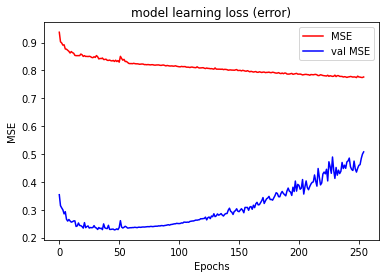

In [49]:
# plot learning history [ MSE ]
plt.plot(history.history['loss'], label='MSE', color='r')
plt.plot(history.history['val_loss'], label='val MSE', color='b')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('model learning loss (error)')
plt.legend();

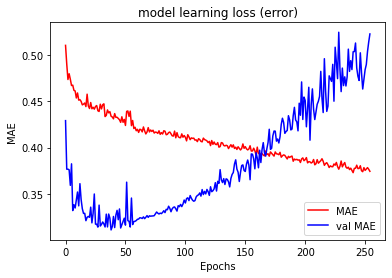

In [48]:
# plot learning history [ MAE ]
plt.plot(history.history['mae'], label='MAE', color='r')
plt.plot(history.history['val_mae'], label='val MAE', color='b')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('model learning loss (error)')
plt.legend();